In [24]:
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("ad_spend.csv")
print(df.shape)
df.head(5)

(200, 3)


,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [4]:
g = df.groupby("Season")[["Ad Spend ($)","Revenue ($)"]].mean()
g.head()

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


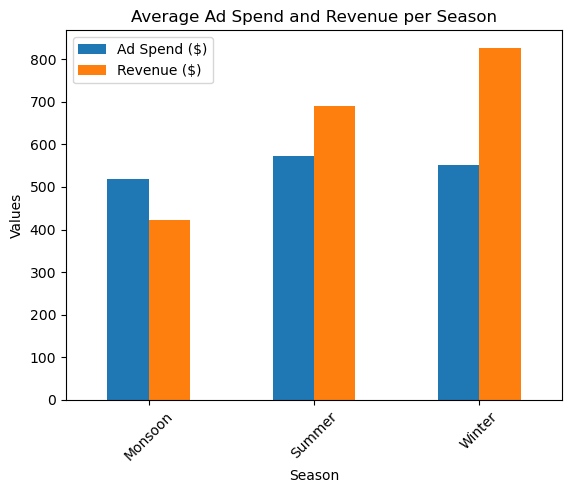

In [8]:
ax = g.plot(kind="bar")
ax.set_title('Average Ad Spend and Revenue per Season')
ax.set_xlabel('Season')
ax.set_ylabel('Values')
plt.xticks(rotation=45)
plt.show()

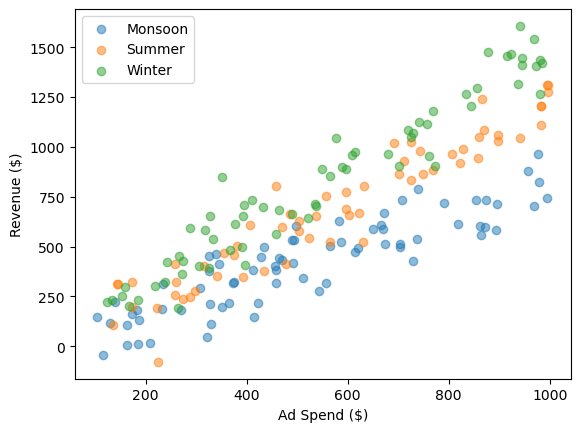

In [12]:
for season,subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"],subdf["Revenue ($)"],label=season,alpha=0.5)
plt.xlabel("Ad Spend ($)")    
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

In [13]:
df_encoded = pd.get_dummies(df,columns=["Season"],drop_first=True)
df_encoded.head()

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True


In [15]:
from sklearn.model_selection import train_test_split

X=df_encoded.drop("Revenue ($)",axis=1)
y=df_encoded["Revenue ($)"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))
y_pred_lm = lm.predict(X_test)
mse = mean_squared_error(y_test,y_pred_lm)
mse

0.9004557896885321


13825.236710256346

In [27]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test,y_pred_dt)
r2_dt

0.8354902585133208

In [35]:
gb = GradientBoostingRegressor(n_estimators=40)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.8933983954251393

In [36]:
y_pred_gb = gb.predict(X_test)
pred = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : y_pred_gb
})
pred.head()

,Actual,Predicted
95,903,954.126339
15,1047,892.444092
30,1026,887.065274
158,1203,1275.645338
128,558,678.618788


In [37]:
pred["Diff %"]=abs((pred["Predicted"]-pred["Actual"])*100/pred["Actual"])
pred.head()

,Actual,Predicted,Diff %
95,903,954.126339,5.661832
15,1047,892.444092,14.761787
30,1026,887.065274,13.541396
158,1203,1275.645338,6.038681
128,558,678.618788,21.616270
